## Classification
```
1. SVM
2. Logistic Regression
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pl

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data  = pd.read_csv('adult.data',sep = ',')

In [4]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [8]:
data.shape

(32561, 15)

In [9]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [10]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [11]:
data['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [12]:
data['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [13]:
data['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [14]:
data['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [15]:
data['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [16]:
data['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [17]:
data['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [18]:
data['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [19]:
data['workclass'] = data['workclass'].replace('?', 'Private')
data['occupation'] = data['occupation'].replace('?', 'Prof-specialty')
data['native-country'] = data['native-country'].replace('?', 'United-States')

### Feature Engineering

In [20]:
#education Category
data.education = data.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school',regex = True)
data.education = data.education.replace('HS-grad', 'high school',regex = True)
data.education = data.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher',regex = True)
data.education = data.education.replace('Bachelors', 'undergraduate',regex = True)
data.education = data.education.replace('Masters', 'graduate',regex = True)
data.education = data.education.replace('Doctorate', 'doctor',regex = True)

In [21]:
#martial status
data['marital-status']= data['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married',regex = True)
data['marital-status']= data['marital-status'].replace(['Never-married'], 'not-married',regex = True)
data['marital-status']= data['marital-status'].replace(['Divorced', 'Separated','Widowed','Married-spouse-absent'], 'other',regex = True)

In [22]:
#income
data['income'] = data['income'].replace('<=50K',0,regex = True)
data['income'] = data['income'].replace('>50K',1,regex = True)

In [23]:
data.head(4)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,undergraduate,13,not-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,undergraduate,13,married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,high school,9,other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,school,7,married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0


In [24]:
data.tail(8)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32553,32,Private,116138,graduate,14,not-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,0
32554,53,Private,321865,graduate,14,married,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
32555,22,Private,310152,higher,10,not-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32556,27,Private,257302,higher,12,married,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,high school,9,married,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,high school,9,other,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,high school,9,not-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,high school,9,married,Exec-managerial,Wife,White,Female,15024,0,40,United-States,1


In [25]:
data['marital-status'].value_counts()

 married        14999
 not-married    10683
 other           6879
Name: marital-status, dtype: int64

In [26]:
data['education'].value_counts()

 high school      10501
 higher           10316
 undergraduate     5355
 school            4253
 graduate          1723
 doctor             413
Name: education, dtype: int64

In [27]:
data['income'] = data['income'].astype(str).astype(int)

In [28]:
data['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [29]:
data['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [30]:
data['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [31]:
data['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

### EDA

<AxesSubplot:xlabel='income', ylabel='count'>

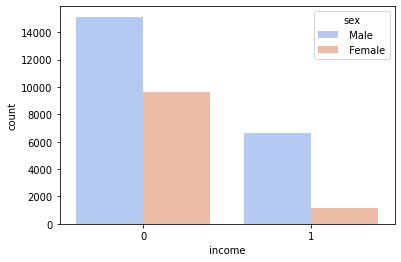

In [32]:
sns.countplot(data['income'],palette = 'coolwarm',hue = 'sex',data = data)

<AxesSubplot:>

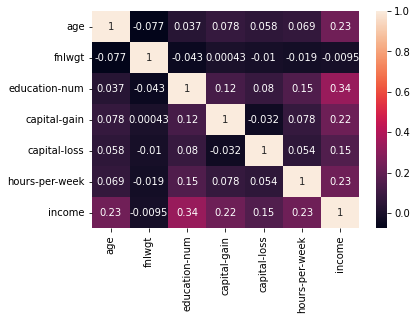

In [33]:
sns.heatmap(data = data.corr(),annot = True)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 3.6+ MB


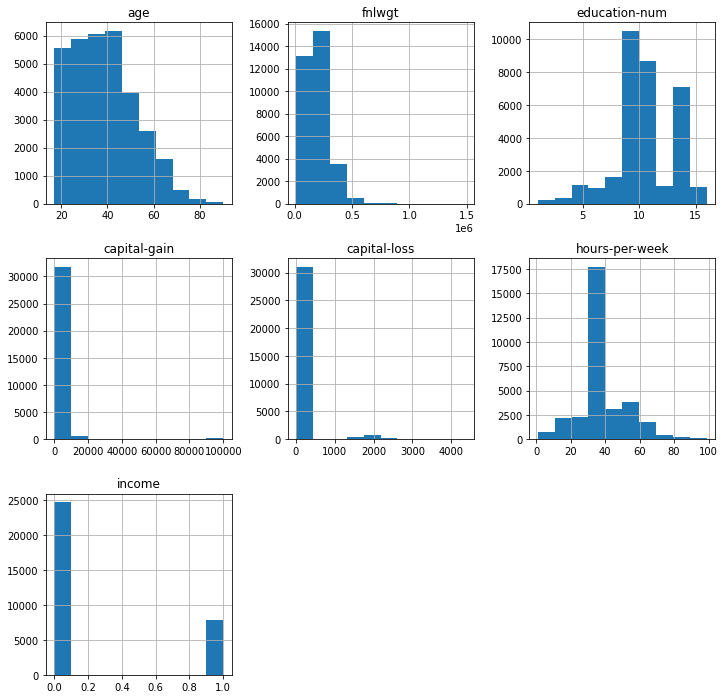

In [35]:
data.hist(figsize=(12,12), layout=(3,3), sharex=False);

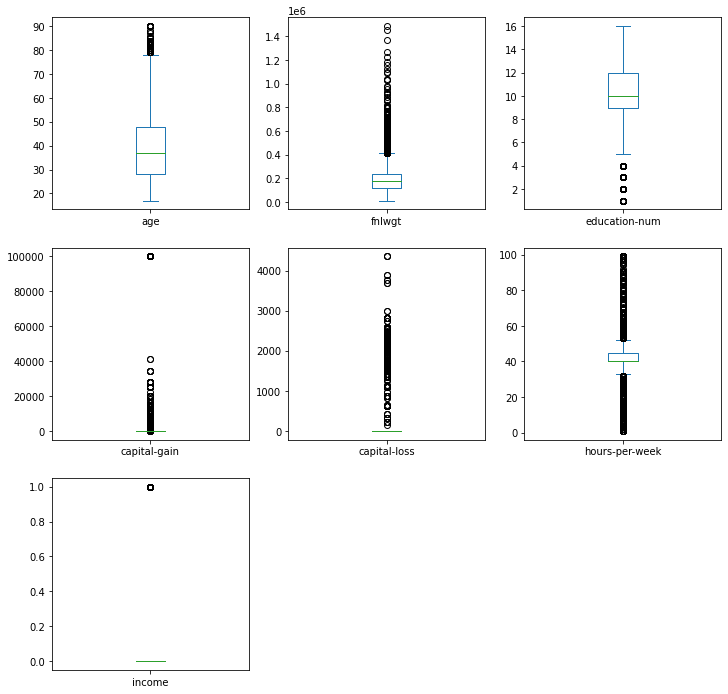

In [36]:
data.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True);

### Feature Scaling

In [37]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [38]:
#Applying Label Encoder
le = LabelEncoder()

In [39]:
objl = list(data.select_dtypes(include=['object']).columns)

In [40]:
#Passing all object columns
for i in objl:
    data[i]= le.fit_transform(data[i])

In [41]:
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,5,13,1,1,1,4,1,2174,0,40,39,0
1,50,6,83311,5,13,0,4,0,4,1,0,0,13,39,0
2,38,4,215646,2,9,2,6,1,4,1,0,0,40,39,0
3,53,4,234721,4,7,0,6,0,2,1,0,0,40,39,0
4,28,4,338409,5,13,0,10,5,2,0,0,0,40,5,0
5,37,4,284582,1,14,0,4,5,4,0,0,0,40,39,0
6,49,4,160187,4,5,2,8,1,2,0,0,0,16,23,0
7,52,6,209642,2,9,0,4,0,4,1,0,0,45,39,1
8,31,4,45781,1,14,1,10,1,4,0,14084,0,50,39,1
9,42,4,159449,5,13,0,4,0,4,1,5178,0,40,39,1


### Train Test Split

In [42]:
X = data.drop('income',axis = 1)
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,7,77516,5,13,1,1,1,4,1,2174,0,40,39
1,50,6,83311,5,13,0,4,0,4,1,0,0,13,39
2,38,4,215646,2,9,2,6,1,4,1,0,0,40,39
3,53,4,234721,4,7,0,6,0,2,1,0,0,40,39
4,28,4,338409,5,13,0,10,5,2,0,0,0,40,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,3,12,0,13,5,4,0,0,0,38,39
32557,40,4,154374,2,9,0,7,0,4,1,0,0,40,39
32558,58,4,151910,2,9,2,1,4,4,0,0,0,40,39
32559,22,4,201490,2,9,1,1,3,4,1,0,0,20,39


In [43]:
y = data['income']
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int32

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Standard Scaler

In [46]:
scaler = StandardScaler()

In [47]:
X_train_scaled = scaler.fit_transform(X_train)

In [48]:
X_test_scaled = scaler.transform(X_test)

### SVM Model

In [49]:
from sklearn.svm import SVC

In [50]:
SVC_Clf_linear = SVC(kernel = 'linear',gamma = 'scale', shrinking = False,)
SVC_Clf_linear.fit(X_train_scaled, y_train)

SVC(kernel='linear', shrinking=False)

In [51]:
SVC_Clf_linear.coef_

array([[ 0.29577953, -0.03533659,  0.04900704,  0.0244351 ,  0.7151144 ,
        -0.71564042,  0.02618759,  0.10210991,  0.05902355,  0.090631  ,
         1.72972715,  0.1973952 ,  0.25156833,  0.04549436]])

In [52]:
y_pred_linear = SVC_Clf_linear.predict(X_test_scaled)

In [53]:
SVC_Clf_linear.score(X_test_scaled,y_test)

0.8419877163595757

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
accuracy_score(y_test,y_pred)

0.8419877163595757

In [56]:
# Polynomial Kernel 
SVC_Clf_poly = SVC(kernel = 'poly',gamma = 'scale', shrinking = False)
SVC_Clf_poly.fit(X_train_scaled,y_train)

SVC(kernel='poly', shrinking=False)

In [57]:
SVC_Clf_poly.score(X_test_scaled,y_test)

0.8452447422296668

In [104]:
#RBF Kernel
SVC_Clf_rbf = SVC(kernel = 'rbf',gamma = 'scale', shrinking = False)
SVC_Clf_rbf.fit(X_train_scaled,y_train)

SVC(shrinking=False)

In [59]:
SVC_Clf_rbf.score(X_test_scaled,y_test)

0.8498045784477946

In [105]:
y_pred_rbf = SVC_Clf_rbf.predict(X_test_scaled)

In [60]:
#Sigmoid Kernel
SVC_Clf_sigmoid = SVC(kernel = 'sigmoid',gamma = 'scale', shrinking = False)
SVC_Clf_sigmoid.fit(X_train_scaled,y_train)

SVC(kernel='sigmoid', shrinking=False)

In [61]:
SVC_Clf_sigmoid.score(X_test_scaled,y_test)

0.7761957937837335

In [ ]:
#::::Grid Search CV taking time::::

### Logistic Regression

In [63]:
#logistic Classification
from sklearn.linear_model import LogisticRegression

In [64]:
lr = LogisticRegression()

In [65]:
lr.fit(X_train_scaled,y_train)

LogisticRegression()

In [86]:
y_pred_lr = lr.predict(X_test_scaled)
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0])

In [87]:
lr.score(X_test_scaled,y_test)

0.8364042434394193

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_lr)

0.8364042434394193

### Grid Search CV on Logistic Regression

In [79]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator = lr, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)


In [82]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.838488 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.838140 (0.006461) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.790209 (0.007278) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.794294 (0.007162) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.838488 (0.006492) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.790178 (0.007135) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.792748 (0.007041) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.838345 (0.006692) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.790414 (0.006888) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.794140 (0.006942) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.838263 (0.006964) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.790178 (0.007217) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.793557 (0.007110) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.838130 (0.006159) with

### Best Accuracy
```
Logistic Regression : 0.838     ~0.84
SVM : 0.849                     ~0.85
```

### Confusion Matrix SVM

In [106]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,y_pred_rbf)

<AxesSubplot:>

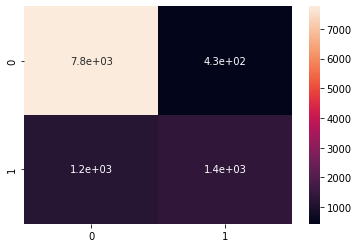

In [107]:
sns.heatmap(cnf_matrix, annot=True)

In [108]:
tp = cnf_matrix[0][0]
fp = cnf_matrix[0][1]
fn = cnf_matrix[1][0]
tn = cnf_matrix[1][1]

In [109]:
# Breaking down the formula for Accuracy
accuracy = (tp + tn) / (tp + fp + fn + tn)
print("Model Accuracy : ",accuracy)

Model Accuracy :  0.8498045784477946


In [110]:
# Precison
precision = tp / (tp + fp)
print("Precision :",precision)

Precision : 0.9470473401659346


In [111]:
# Recall
recall = tp /(tp + fn)
print("Recall :",recall)

Recall : 0.8680384701409081


In [112]:
# F1 Score
f1_score = 2*(recall * precision) / (recall + precision)
print("F1_Score :",f1_score)

F1_Score : 0.9058233166063717


### Confusion Matrix Logistic Regression

In [89]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,y_pred_lr)

<AxesSubplot:>

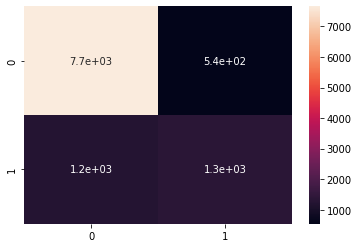

In [90]:
sns.heatmap(cf_matrix, annot=True)

In [91]:
true_positive = cf_matrix[0][0]
false_positive = cf_matrix[0][1]
false_negative = cf_matrix[1][0]
true_negative = cf_matrix[1][1]

In [92]:
# Breaking down the formula for Accuracy
accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
print("Model Accuracy : ",accuracy)

Model Accuracy :  0.8364042434394193


In [93]:
# Precison
precision = true_positive/(true_positive+false_positive)
print("Precision :",precision)

Precision : 0.9344802342606149


In [94]:
# Recall
recall = true_positive/(true_positive+false_negative)
print("Recall :",recall)

Recall : 0.8625


In [95]:
# F1 Score
f1_score = 2*(recall * precision) / (recall + precision)
print("F1_Score :",f1_score)

F1_Score : 0.8970484891075193


In [97]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Area Under Curve
auc = roc_auc_score(y_test, y_pred_lr)
auc

0.727828352424425

In [98]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)

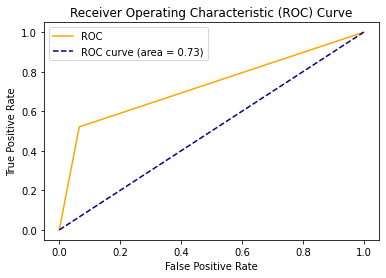

In [100]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()